# NOTES: 
## Date Last Updated:
### 02.06.22

## TO DO:

### [ ] Try Scaling By Grouped Columns
### [ ] Attemp to Normalize After Scaling :) 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import sys
np.set_printoptions(threshold=sys.maxsize)
from sklearn import svm
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('newdata.csv')
data.head()

,What is your age?,Which gender do you identify most with?,What is the highest grade (or year) of regular school you have completed?,Which of the following best describes you?,"Which of the following, if any, images are you familiar with?",Do you believe multi-factor authentication improves security?,How important is online security to you?,How important is quick log in authentication to you?,How important is usability during log in authentication to you?,How important is convenience during log in authentication to you?,How satisfied are you with current log in systems?,How often do you opt to use multi-factor authentication when given the choice?,"Which of the following examples, if any, of multi-factor authentication systems have you used?"
0,35-44,Female,Graduate School,Two or more races,"SMS text-message, Software Token or Pin Passco...",Yes,10,9,10,9,8,Often,"SMS verification, Email verification, Phone Ca..."
1,25-34,Female,Graduate School,White or Caucasian,"SMS text-message, Software Token or Pin Passco...",Yes,7,10,9,7,8,Sometimes,"SMS verification, Email verification, PIN, QR ..."
2,25-34,Gender Variant/Non-Conforming,High School,White or Caucasian,"SMS text-message, Software Token or Pin Passco...",Yes,6,8,8,8,7,Sometimes,"SMS verification, Email verification, PIN, QR ..."
3,25-34,Male,High School,Black or African American,"SMS text-message, Software Token or Pin Passco...",Yes,10,10,10,10,10,Often,"SMS verification, Email verification, Phone Ca..."
4,18-24,Male,Graduate School,White or Caucasian,"SMS text-message, Software Token or Pin Passco...",Yes,10,10,10,10,10,Often,"SMS verification, Email verification, Phone Ca..."


In [3]:
# check for nan values
data[data.isna().any(axis=1)]

,What is your age?,Which gender do you identify most with?,What is the highest grade (or year) of regular school you have completed?,Which of the following best describes you?,"Which of the following, if any, images are you familiar with?",Do you believe multi-factor authentication improves security?,How important is online security to you?,How important is quick log in authentication to you?,How important is usability during log in authentication to you?,How important is convenience during log in authentication to you?,How satisfied are you with current log in systems?,How often do you opt to use multi-factor authentication when given the choice?,"Which of the following examples, if any, of multi-factor authentication systems have you used?"


In [37]:
#independent variables 
X = data.iloc[:,:-1]
X

,What is your age?,Which gender do you identify most with?,What is the highest grade (or year) of regular school you have completed?,Which of the following best describes you?,"Which of the following, if any, images are you familiar with?",Do you believe multi-factor authentication improves security?,How important is online security to you?,How important is quick log in authentication to you?,How important is usability during log in authentication to you?,How important is convenience during log in authentication to you?,How satisfied are you with current log in systems?,How often do you opt to use multi-factor authentication when given the choice?
0,35-44,Female,Graduate School,Two or more races,"SMS text-message, Software Token or Pin Passco...",Yes,10,9,10,9,8,Often
1,25-34,Female,Graduate School,White or Caucasian,"SMS text-message, Software Token or Pin Passco...",Yes,7,10,9,7,8,Sometimes
2,25-34,Gender Variant/Non-Conforming,High School,White or Caucasian,"SMS text-message, Software Token or Pin Passco...",Yes,6,8,8,8,7,Sometimes
3,25-34,Male,High School,Black or African American,"SMS text-message, Software Token or Pin Passco...",Yes,10,10,10,10,10,Often
4,18-24,Male,Graduate School,White or Caucasian,"SMS text-message, Software Token or Pin Passco...",Yes,10,10,10,10,10,Often
...,...,...,...,...,...,...,...,...,...,...,...,...
181,18-24,Female,Graduate School,White or Caucasian,"SMS text-message, Software Token or Pin Passco...",Yes,10,10,10,10,6,Always
182,18-24,Male,High School,White or Caucasian,"SMS text-message, Software Token or Pin Passco...",Yes,8,10,7,10,7,Often
183,18-24,Female,College,White or Caucasian,"SMS text-message, Software Token or Pin Passco...",Yes,10,8,8,8,7,Often
184,45-54,Male,College,White or Caucasian,"SMS text-message, Software Token or Pin Passco...",Yes,10,6,6,6,10,Always


In [38]:
#dependent variables
y = data.iloc[:, 12:13]
y

,"Which of the following examples, if any, of multi-factor authentication systems have you used?"
0,"SMS verification, Email verification, Phone Ca..."
1,"SMS verification, Email verification, PIN, QR ..."
2,"SMS verification, Email verification, PIN, QR ..."
3,"SMS verification, Email verification, Phone Ca..."
4,"SMS verification, Email verification, Phone Ca..."
...,...
181,"SMS verification, Email verification, Phone Ca..."
182,"SMS verification, Email verification, Phone Ca..."
183,"SMS verification, Email verification, Phone Ca..."
184,"SMS verification, Email verification, PIN, QR ..."


In [39]:
data_numeric = data[['Do you believe multi-factor authentication improves security?', 
                 'How important is online security to you?', 
                 'How important is quick log in authentication to you?',
                 'How important is usability during log in authentication to you?',
                 'How important is convenience during log in authentication to you?',
                 'How satisfied are you with current log in systems?',
                 'How often do you opt to use multi-factor authentication when given the choice?', 
                 'Which of the following examples, if any, of multi-factor authentication systems have you used?']]


data_categorical = data[['What is your age?', 
                     'Which gender do you identify most with?', 
                     'What is the highest grade (or year) of regular school you have completed?', 
                     'Which of the following best describes you?', 
                     'Which of the following, if any, images are you familiar with?']]

#data_output = data[['Which of the following examples, if any, of multi-factor authentication systems have you used']]

In [40]:
data_categorical.head()

,What is your age?,Which gender do you identify most with?,What is the highest grade (or year) of regular school you have completed?,Which of the following best describes you?,"Which of the following, if any, images are you familiar with?"
0,35-44,Female,Graduate School,Two or more races,"SMS text-message, Software Token or Pin Passco..."
1,25-34,Female,Graduate School,White or Caucasian,"SMS text-message, Software Token or Pin Passco..."
2,25-34,Gender Variant/Non-Conforming,High School,White or Caucasian,"SMS text-message, Software Token or Pin Passco..."
3,25-34,Male,High School,Black or African American,"SMS text-message, Software Token or Pin Passco..."
4,18-24,Male,Graduate School,White or Caucasian,"SMS text-message, Software Token or Pin Passco..."


In [41]:
data_numeric.head()

,Do you believe multi-factor authentication improves security?,How important is online security to you?,How important is quick log in authentication to you?,How important is usability during log in authentication to you?,How important is convenience during log in authentication to you?,How satisfied are you with current log in systems?,How often do you opt to use multi-factor authentication when given the choice?,"Which of the following examples, if any, of multi-factor authentication systems have you used?"
0,Yes,10,9,10,9,8,Often,"SMS verification, Email verification, Phone Ca..."
1,Yes,7,10,9,7,8,Sometimes,"SMS verification, Email verification, PIN, QR ..."
2,Yes,6,8,8,8,7,Sometimes,"SMS verification, Email verification, PIN, QR ..."
3,Yes,10,10,10,10,10,Often,"SMS verification, Email verification, Phone Ca..."
4,Yes,10,10,10,10,10,Often,"SMS verification, Email verification, Phone Ca..."


In [42]:
#unique values for categorical headers 
#will category encode these 
print(data['What is your age?'].unique())
print(data['Which gender do you identify most with?'].unique())
print(data['What is the highest grade (or year) of regular school you have completed?'].unique())
print(data['Which of the following best describes you?'].unique())
print(data['Which of the following, if any, images are you familiar with?'].unique())
print(data['Which of the following examples, if any, of multi-factor authentication systems have you used?'].unique())

['35-44' '25-34' '18-24' '45-54' '55-64' '65']
['Female' 'Gender Variant/Non-Conforming' 'Male']
['Graduate School' 'High School' 'Prefer Not to Answer' 'College'
 'Elementary School']
['Two or more races' 'White or Caucasian' 'Black or African American'
 'Hispanic or Latino' 'Asian or Pacific Islander' 'Indian']
['SMS text-message, Software Token or Pin Passcode, Biometric (or Fingerprint) 2FA verification, Push Notification'
 'SMS text-message, Software Token or Pin Passcode, Biometric (or Fingerprint) 2FA verification, Push Notification, Hardware Token, Facial Recognition'
 'SMS text-message, Software Token or Pin Passcode, Biometric (or Fingerprint) 2FA verification, Facial Recognition'
 'SMS text-message, Software Token or Pin Passcode, Biometric (or Fingerprint) 2FA verification, Push Notification, Facial Recognition'
 'SMS text-message, Software Token or Pin Passcode, Push Notification, Hardware Token'
 'SMS text-message, Biometric (or Fingerprint) 2FA verification, Push Notific

In [43]:
# Dependent Variable 
y = data.iloc[:, 12:13].astype(str)
# ordinal encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [44]:
#Age Encoder

from sklearn.preprocessing import LabelEncoder

age_encoder = LabelEncoder()
age_encoder.fit(data_categorical['What is your age?'])
age_values = age_encoder.transform(data_categorical['What is your age?'])
age_values

array([2, 1, 1, 1, 0, 1, 1, 1, 2, 3, 1, 0, 0, 1, 0, 0, 2, 0, 3, 0, 0, 0,
       0, 1, 1, 0, 2, 2, 0, 0, 1, 0, 3, 1, 4, 2, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 2, 0, 0, 0, 0, 1, 2, 0, 2, 1, 0, 0, 2, 0, 0, 0, 2, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 3, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 3, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 1, 2, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 3, 2, 4, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 2, 0, 0, 0, 3, 1])

In [45]:
#Gender Encoder

from sklearn.preprocessing import LabelEncoder

gender_encoder = LabelEncoder()
gender_encoder.fit(data_categorical['Which gender do you identify most with?'])
gender_values = gender_encoder.transform(data_categorical['Which gender do you identify most with?'])
gender_values

array([0, 0, 1, 2, 2, 0, 2, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2,
       0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0,
       0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2,
       2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0,
       0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 2, 0, 2, 0, 2, 0])

In [46]:
#Education Level Encoder

#does education categories really matter? If ranked? I read it is categorical data.
#But I can assign values later.

from sklearn.preprocessing import LabelEncoder

education_encoder = LabelEncoder()
education_encoder.fit(data_categorical['What is the highest grade (or year) of regular school you have completed?'])
education_values = education_encoder.transform(data_categorical['What is the highest grade (or year) of regular school you have completed?'])
education_values

array([2, 2, 3, 3, 2, 4, 0, 2, 2, 3, 3, 0, 0, 2, 3, 0, 2, 0, 2, 3, 3, 2,
       2, 0, 0, 2, 3, 0, 3, 3, 3, 3, 2, 3, 0, 0, 3, 3, 3, 2, 0, 3, 3, 2,
       3, 2, 0, 2, 3, 2, 0, 2, 2, 2, 2, 0, 3, 2, 2, 2, 0, 3, 0, 0, 2, 3,
       3, 0, 0, 2, 2, 2, 2, 0, 2, 3, 3, 0, 0, 0, 3, 0, 4, 3, 2, 0, 3, 0,
       3, 3, 2, 0, 0, 0, 3, 3, 0, 3, 2, 2, 3, 1, 2, 3, 2, 2, 0, 2, 2, 2,
       3, 3, 3, 0, 2, 2, 4, 1, 3, 2, 0, 0, 0, 3, 3, 3, 0, 0, 0, 3, 2, 2,
       2, 0, 3, 2, 3, 0, 0, 3, 3, 2, 3, 2, 2, 3, 0, 2, 2, 2, 3, 2, 0, 0,
       2, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 2, 2, 0, 3, 3, 0,
       3, 3, 2, 3, 3, 2, 3, 0, 0, 0])

In [47]:
#Ethnicity Encoder

from sklearn.preprocessing import LabelEncoder

ethnicity_encoder = LabelEncoder()
ethnicity_encoder.fit(data_categorical['Which of the following best describes you?'])
ethnicity_values = ethnicity_encoder.transform(data_categorical['Which of the following best describes you?'])
ethnicity_values

array([4, 5, 5, 1, 5, 1, 1, 5, 2, 5, 0, 1, 5, 1, 5, 2, 1, 5, 5, 1, 2, 1,
       1, 2, 5, 1, 5, 5, 5, 2, 5, 2, 5, 1, 5, 0, 1, 5, 1, 1, 1, 5, 5, 1,
       1, 1, 1, 5, 5, 5, 5, 1, 5, 2, 5, 0, 5, 5, 1, 1, 5, 1, 1, 5, 1, 1,
       5, 2, 1, 2, 3, 5, 5, 2, 1, 1, 2, 1, 5, 3, 2, 1, 1, 5, 5, 5, 5, 1,
       5, 1, 5, 5, 5, 1, 1, 2, 1, 5, 1, 1, 5, 5, 2, 4, 1, 1, 5, 1, 1, 1,
       5, 2, 5, 1, 5, 1, 1, 5, 1, 1, 5, 1, 1, 1, 1, 1, 2, 1, 1, 2, 5, 2,
       1, 2, 4, 1, 2, 1, 1, 1, 5, 5, 1, 5, 2, 5, 2, 5, 2, 1, 5, 2, 5, 5,
       2, 1, 1, 1, 1, 5, 5, 2, 5, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 5, 5,
       1, 5, 1, 2, 5, 5, 5, 5, 5, 1])

In [48]:
#Image Familiarity Encoder

from sklearn.preprocessing import LabelEncoder

image_encoder = LabelEncoder()
image_encoder.fit(data_categorical['Which of the following, if any, images are you familiar with?'])
image_values = image_encoder.transform(data_categorical['Which of the following, if any, images are you familiar with?'])
image_values

array([19, 22, 16, 20, 20, 25, 22, 10,  7, 14, 23, 11, 22, 20, 16, 19, 20,
       20,  6, 20, 22, 22, 19, 14, 20, 16, 11, 20, 19,  5, 22, 11, 22,  6,
       22, 20, 13, 20, 11, 28, 22, 22, 22, 22, 13, 22, 22, 28, 22, 22, 20,
       19, 28, 27, 20,  0, 24, 13, 11, 16, 10, 11, 22, 22, 13, 26, 16, 10,
       20, 22, 22, 16, 15, 20, 20, 22, 26, 21, 22, 26, 20, 22, 20, 11, 16,
        6, 22, 16, 29, 20,  1, 11, 22, 22, 17, 20, 18,  9, 16, 22, 19, 22,
       20, 20, 20, 22, 22, 22, 16, 22, 22, 20, 22,  7, 24, 20, 22, 22, 20,
        7, 20,  3, 20, 23,  8, 13, 19, 21, 16, 22, 20, 19, 20, 20, 20, 22,
        2, 12, 11, 21,  3, 15, 20, 13, 20, 20, 22, 15, 22, 22, 21, 20,  7,
       16, 22, 20, 13,  3, 20, 22, 15, 16,  4, 18, 20,  6,  7, 19, 22, 22,
       22, 22, 22, 20, 22, 20, 20, 22, 22, 15,  7, 23, 15, 22, 22, 22])

In [49]:
#unique values for numeric headers 
# will ordinal encode these 

print(data['Do you believe multi-factor authentication improves security?'].unique())
print(data['How important is online security to you?'].unique())
print(data['How important is quick log in authentication to you?'].unique())
print(data['How important is usability during log in authentication to you?'].unique())
print(data['How important is convenience during log in authentication to you?'].unique())
print(data['How satisfied are you with current log in systems?'].unique())
print(data['How often do you opt to use multi-factor authentication when given the choice?'].unique())

['Yes' 'Maybe' 'No']
[10  7  6  9  5  8  4]
[ 9 10  8  5  7  6  3  4  2]
[10  9  8  7  6  4  3  5]
[ 9  7  8 10  6  5  4]
[ 8  7 10  9  6  5  3  4]
['Often' 'Sometimes' 'Always' 'Never']


In [50]:
#Improves Security Encoder

from sklearn.preprocessing import OrdinalEncoder

security_encoder = OrdinalEncoder()
security_encoder.fit(data_numeric[['Do you believe multi-factor authentication improves security?']])
security_values = security_encoder.transform(data_numeric[['Do you believe multi-factor authentication improves security?']])
security_values

array([[2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [0.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],

In [51]:
#Online Security Encoder 

from sklearn.preprocessing import OrdinalEncoder

online_encoder = OrdinalEncoder()
online_encoder.fit(data_numeric[['How important is online security to you?']])
online_values = online_encoder.transform(data_numeric[['How important is online security to you?']])
online_values

array([[6.],
       [3.],
       [2.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [2.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [5.],
       [6.],
       [1.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [5.],
       [6.],
       [6.],
       [5.],
       [5.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [4.],
       [6.],
       [6.],
       [6.],
       [6.],
       [5.],
       [4.],
       [6.],
       [6.],
       [6.],
       [6.],
       [5.],
       [5.],
       [6.],
       [6.],
       [5.],
       [4.],
       [6.],
       [6.],
       [6.],
       [6.],
       [3.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [4.],
       [6.],
       [6.],
       [6.],
       [6.],
       [5.],
       [3.],
       [6.],
       [5.],
       [6.],
       [6.],
       [4.],
       [6.],
       [6.],

In [52]:
#Quick Log In Encoder

from sklearn.preprocessing import OrdinalEncoder

quick_encoder = OrdinalEncoder()
quick_encoder.fit(data_numeric[['How important is quick log in authentication to you?']])
quick_values = quick_encoder.transform(data_numeric[['How important is quick log in authentication to you?']])
quick_values                          

array([[7.],
       [8.],
       [6.],
       [8.],
       [8.],
       [6.],
       [3.],
       [8.],
       [7.],
       [8.],
       [8.],
       [8.],
       [8.],
       [8.],
       [8.],
       [6.],
       [7.],
       [5.],
       [6.],
       [4.],
       [5.],
       [8.],
       [8.],
       [7.],
       [6.],
       [7.],
       [7.],
       [8.],
       [7.],
       [6.],
       [8.],
       [8.],
       [4.],
       [8.],
       [8.],
       [8.],
       [3.],
       [8.],
       [6.],
       [8.],
       [7.],
       [6.],
       [4.],
       [8.],
       [8.],
       [8.],
       [8.],
       [5.],
       [8.],
       [8.],
       [7.],
       [7.],
       [7.],
       [8.],
       [8.],
       [8.],
       [6.],
       [5.],
       [8.],
       [6.],
       [4.],
       [8.],
       [8.],
       [8.],
       [8.],
       [7.],
       [7.],
       [7.],
       [8.],
       [6.],
       [8.],
       [7.],
       [6.],
       [8.],
       [7.],
       [8.],
       [8.],

In [53]:
#Usability Encoder

from sklearn.preprocessing import OrdinalEncoder

usability_encoder = OrdinalEncoder()
usability_encoder.fit(data_numeric[['How important is usability during log in authentication to you?']])
usability_values = usability_encoder.transform(data_numeric[['How important is usability during log in authentication to you?']])
usability_values               

array([[7.],
       [6.],
       [5.],
       [7.],
       [7.],
       [7.],
       [7.],
       [5.],
       [6.],
       [4.],
       [7.],
       [7.],
       [7.],
       [7.],
       [7.],
       [7.],
       [6.],
       [5.],
       [5.],
       [3.],
       [7.],
       [7.],
       [7.],
       [6.],
       [7.],
       [6.],
       [7.],
       [7.],
       [5.],
       [4.],
       [7.],
       [5.],
       [3.],
       [7.],
       [7.],
       [7.],
       [5.],
       [7.],
       [1.],
       [7.],
       [0.],
       [6.],
       [6.],
       [7.],
       [7.],
       [7.],
       [5.],
       [3.],
       [7.],
       [5.],
       [7.],
       [5.],
       [5.],
       [7.],
       [7.],
       [5.],
       [5.],
       [3.],
       [7.],
       [5.],
       [7.],
       [7.],
       [7.],
       [7.],
       [7.],
       [6.],
       [6.],
       [4.],
       [6.],
       [4.],
       [6.],
       [7.],
       [6.],
       [7.],
       [6.],
       [5.],
       [7.],

In [54]:
#Convenience Encoder

from sklearn.preprocessing import OrdinalEncoder

convenience_encoder = OrdinalEncoder()
convenience_encoder.fit(data_numeric[['How important is convenience during log in authentication to you?']])
convenience_values = convenience_encoder.transform(data_numeric[['How important is convenience during log in authentication to you?']])
convenience_values               

array([[5.],
       [3.],
       [4.],
       [6.],
       [6.],
       [6.],
       [6.],
       [3.],
       [5.],
       [3.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [4.],
       [6.],
       [3.],
       [4.],
       [2.],
       [4.],
       [6.],
       [6.],
       [4.],
       [3.],
       [4.],
       [5.],
       [6.],
       [5.],
       [4.],
       [6.],
       [6.],
       [2.],
       [5.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [5.],
       [4.],
       [1.],
       [6.],
       [6.],
       [6.],
       [0.],
       [2.],
       [6.],
       [4.],
       [6.],
       [4.],
       [5.],
       [6.],
       [6.],
       [6.],
       [4.],
       [5.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [5.],
       [5.],
       [3.],
       [5.],
       [6.],
       [4.],
       [6.],
       [5.],
       [4.],
       [6.],
       [5.],
       [6.],
       [6.],

In [55]:
#Current Systems Encoder

from sklearn.preprocessing import OrdinalEncoder

current_encoder = OrdinalEncoder()
current_encoder.fit(data_numeric[['How satisfied are you with current log in systems?']])
current_values = usability_encoder.transform(data_numeric[['How satisfied are you with current log in systems?']])
current_values              

array([[5.],
       [5.],
       [4.],
       [7.],
       [7.],
       [6.],
       [7.],
       [3.],
       [4.],
       [2.],
       [5.],
       [7.],
       [6.],
       [3.],
       [4.],
       [7.],
       [6.],
       [4.],
       [5.],
       [2.],
       [7.],
       [7.],
       [7.],
       [6.],
       [3.],
       [5.],
       [5.],
       [5.],
       [2.],
       [5.],
       [5.],
       [3.],
       [6.],
       [7.],
       [6.],
       [5.],
       [5.],
       [0.],
       [2.],
       [7.],
       [6.],
       [4.],
       [6.],
       [5.],
       [3.],
       [5.],
       [7.],
       [4.],
       [5.],
       [7.],
       [5.],
       [5.],
       [4.],
       [4.],
       [7.],
       [5.],
       [5.],
       [6.],
       [7.],
       [7.],
       [5.],
       [7.],
       [4.],
       [5.],
       [5.],
       [7.],
       [7.],
       [6.],
       [5.],
       [4.],
       [7.],
       [7.],
       [5.],
       [5.],
       [2.],
       [4.],
       [7.],

In [56]:
#Often Encoder

from sklearn.preprocessing import OrdinalEncoder

often_encoder = OrdinalEncoder()
often_encoder.fit(data_numeric[['How often do you opt to use multi-factor authentication when given the choice?']])
often_values = often_encoder.transform(data_numeric[['How often do you opt to use multi-factor authentication when given the choice?']])
often_values  

array([[2.],
       [3.],
       [3.],
       [2.],
       [2.],
       [3.],
       [2.],
       [0.],
       [2.],
       [3.],
       [2.],
       [3.],
       [3.],
       [0.],
       [0.],
       [0.],
       [2.],
       [0.],
       [1.],
       [0.],
       [2.],
       [0.],
       [3.],
       [0.],
       [2.],
       [0.],
       [0.],
       [2.],
       [2.],
       [3.],
       [3.],
       [3.],
       [0.],
       [2.],
       [2.],
       [0.],
       [0.],
       [0.],
       [3.],
       [0.],
       [3.],
       [2.],
       [3.],
       [2.],
       [3.],
       [2.],
       [2.],
       [3.],
       [3.],
       [0.],
       [0.],
       [3.],
       [1.],
       [2.],
       [2.],
       [3.],
       [3.],
       [3.],
       [3.],
       [2.],
       [3.],
       [0.],
       [0.],
       [3.],
       [3.],
       [0.],
       [2.],
       [3.],
       [0.],
       [2.],
       [3.],
       [0.],
       [2.],
       [2.],
       [0.],
       [3.],
       [3.],

In [58]:
#Systems Used Encoder

from sklearn.preprocessing import OrdinalEncoder

sys_used_encoder  = OrdinalEncoder()
sys_used_encoder.fit(data_numeric[['Which of the following examples, if any, of multi-factor authentication systems have you used?']])
sys_values  = sys_used_encoder.transform(data_numeric[['Which of the following examples, if any, of multi-factor authentication systems have you used?']])
sys_values

array([[56.],
       [26.],
       [26.],
       [64.],
       [57.],
       [61.],
       [81.],
       [38.],
       [86.],
       [83.],
       [12.],
       [46.],
       [36.],
       [57.],
       [42.],
       [74.],
       [67.],
       [80.],
       [ 5.],
       [62.],
       [68.],
       [67.],
       [10.],
       [87.],
       [53.],
       [55.],
       [37.],
       [55.],
       [62.],
       [82.],
       [64.],
       [37.],
       [69.],
       [36.],
       [63.],
       [52.],
       [37.],
       [55.],
       [13.],
       [63.],
       [77.],
       [63.],
       [57.],
       [64.],
       [85.],
       [57.],
       [59.],
       [22.],
       [34.],
       [ 7.],
       [15.],
       [13.],
       [60.],
       [72.],
       [56.],
       [50.],
       [65.],
       [37.],
       [67.],
       [45.],
       [34.],
       [39.],
       [31.],
       [71.],
       [36.],
       [ 2.],
       [31.],
       [82.],
       [39.],
       [17.],
       [66.],
      

In [60]:
# columns to combine: age_values, current_values, convenience_values, usability_values,
# quick_values, online_values, often_values  

# for 'Age Group' column
age = pd.DataFrame(age_values, columns=['Age Group'])

# for 'Gender' column
gender = pd.DataFrame(gender_values, columns=['Gender'])

# for 'Education' column
education = pd.DataFrame(education_values, columns=['Education'])

# for 'Ethnicity' column
ethnicity = pd.DataFrame(ethnicity_values, columns=['Ethnicity'])

# for 'Image Familiarity' column
image_familiarity = pd.DataFrame(image_values, columns=['Image Familiarity'])

# for 'Security Values' column
security_values = pd.DataFrame(security_values, columns=['Security Values'])

# for 'Online Security Importance' column
online_security_importance = pd.DataFrame(online_values, columns=['Online Security Importance'])

# for 'Quick Log In Importance' column
quick_login_importance = pd.DataFrame(quick_values, columns=['Quick Log In Importance'])

# for 'Usability Importance' column
usability_importance = pd.DataFrame(usability_values, columns=['Usability Importance'])

# for 'Convenience Importance' column
convenience_importance = pd.DataFrame(convenience_values, columns=['Convenience Importance'])

# for 'Log In Satisfaction' column
login_satisfaction = pd.DataFrame(current_values, columns=['Log In Satisfaction'])

# for 'MFA Use' column
mfa_use = pd.DataFrame(often_values, columns=['MFA Use'])

# for 'Systems Used' column
sys_used = pd.DataFrame(sys_values, columns=['Systems Used'])

# combine all categorical columns as one dataframe
df_encoded = pd.concat([age, gender, education, ethnicity, image_familiarity, security_values, online_security_importance, quick_login_importance, usability_importance, convenience_importance, login_satisfaction, mfa_use, sys_used], axis=1)

# the preview
print(df_encoded.shape)
df_encoded



(186, 13)


,Age Group,Gender,Education,Ethnicity,Image Familiarity,Security Values,Online Security Importance,Quick Log In Importance,Usability Importance,Convenience Importance,Log In Satisfaction,MFA Use,Systems Used
0,2,0,2,4,19,2.0,6.0,7.0,7.0,5.0,5.0,2.0,56.0
1,1,0,2,5,22,2.0,3.0,8.0,6.0,3.0,5.0,3.0,26.0
2,1,1,3,5,16,2.0,2.0,6.0,5.0,4.0,4.0,3.0,26.0
3,1,2,3,1,20,2.0,6.0,8.0,7.0,6.0,7.0,2.0,64.0
4,0,2,2,5,20,2.0,6.0,8.0,7.0,6.0,7.0,2.0,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,0,0,2,5,23,2.0,6.0,8.0,7.0,6.0,3.0,0.0,58.0
182,0,2,3,5,15,2.0,4.0,8.0,4.0,6.0,4.0,2.0,54.0
183,0,0,0,5,22,2.0,6.0,6.0,5.0,4.0,4.0,2.0,64.0
184,3,2,0,5,22,2.0,6.0,4.0,3.0,2.0,7.0,0.0,24.0


In [74]:
#independent variables
X_input_var = df_encoded.iloc[:,:12].astype(str)

# target variable
y_target = df_encoded.iloc[:,12].astype(str)

# summarize 
print('Input', X_input_var.shape)
print('Output', y_target.shape)

Input (186, 12)
Output (186,)


In [75]:
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_input_var, y_target, test_size=0.33, random_state=1)

#X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop(['Image Familiarity'], axis=1), df_encoded['Image Familiarity'], test_size =0.33, random_state=1)

In [76]:
# Ordinal encode input variables
ordinal_encoder = OrdinalEncoder(handle_unknown = 'ignore')
ordinal_encoder.fit(X_train)
X_train = ordinal_encoder.transform(X_train)
X_test = ordinal_encoder.transform(X_test)

In [64]:
# #Demonstrating feature scaling on a graph

# import pandas as pd
# import numpy as np
# from sklearn import preprocessing
# import matplotlib
# import matplotlib.pyplot as plt
# import seaborn as sns
# matplotlib.style.use('ggplot')
# np.random.seed(1)


# scaler = preprocessing.StandardScaler()
# scaled_df = scaler.fit_transform(df)
# scaled_df = pd.DataFrame(scaled_df, columns=['Age Group', 'Gender', 'Education', 
#                                              'Ethnicity', 'Image Familiarity', 'Security Values',
#                                              'Online Security Importance', 'Quick Log In Importance', 
#                                              'Usability Importance', 'Convenience Importance', 
#                                              'Log In Satisfaction'
# ])


# # fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
# # ax1.set_title('Before feature Scaling')
# # sns.kdeplot(df['Age Group'], ax=ax1)
# # sns.kdeplot(df['Gender'], ax=ax1)
# # sns.kdeplot(df['Education'], ax=ax1)
# # sns.kdeplot(df['Ethnicity'], ax=ax1)
# # sns.kdeplot(df['Image Familiarity'], ax=ax1)
# # sns.kdeplot(df['Security Values'], ax=ax1)
# # sns.kdeplot(df['Online Security Importance'], ax=ax1)
# # sns.kdeplot(df['Quick Log In Importance'], ax=ax1)
# # sns.kdeplot(df['Usability Importance'], ax=ax1)
# # sns.kdeplot(df['Convenience Importance'], ax=ax1)
# # sns.kdeplot(df['Log In Satisfaction'], ax=ax1)
# # ax2.set_title('After feature Scaling')
# # sns.kdeplot(scaled_df['Age Group'], ax=ax2)
# # sns.kdeplot(scaled_df['Gender'], ax=ax2)
# # sns.kdeplot(scaled_df['Education'], ax=ax2)
# # sns.kdeplot(scaled_df['Ethnicity'], ax=ax2)
# # sns.kdeplot(scaled_df['Image Familiarity'], ax=ax2)
# # sns.kdeplot(scaled_df['Security Values'], ax=ax2)
# # sns.kdeplot(scaled_df['Online Security Importance'], ax=ax2)
# # sns.kdeplot(scaled_df['Usability Importance'], ax=ax2)
# # sns.kdeplot(scaled_df['Convenience Importance'], ax=ax2)
# # sns.kdeplot(scaled_df['Log In Satisfaction'], ax=ax2)
# # plt.show()

In [65]:
#scaled_df

# Creating and Training the LinearRegression Model

In [78]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)#predicting the test set results"

LinearRegression()

In [67]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [68]:

# df1 = pd.DataFrame({'Actual': y.values.flatten(), 'Predicted': y_pred.flatten()})
# df1 = pd.DataFrame({'Actual': y.flatten(), 'Predicted': y_pred.flatten()})
# df1.plot(kind='bar')
# plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
# plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# plt.show()

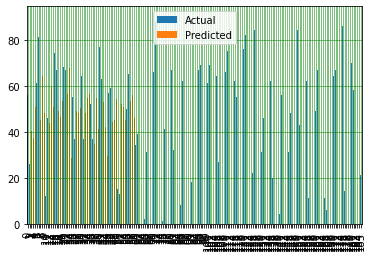

In [69]:
df = ({'Actual': y.flatten(), 'Predicted': y_pred.flatten()})
df1 = pd.DataFrame.from_dict(df, orient ='index')
df1 = df1.transpose()
df1.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Linear Regression Model Evaluation

In [79]:
#Model Evaluation
print(regressor.intercept_)

68.86287024681728


In [80]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns =['Coefficeint'])
coeff_df

,Coefficeint
What is your age?,3.130230
Which gender do you identify most with?,0.921899
What is the highest grade (or year) of regular school you have completed?,-2.612469
Which of the following best describes you?,-0.490419
"Which of the following, if any, images are you familiar with?",-0.042076
Do you believe multi-factor authentication improves security?,-5.846567
How important is online security to you?,-0.342135
How important is quick log in authentication to you?,1.311305
How important is usability during log in authentication to you?,2.918059
How important is convenience during log in authentication to you?,-1.700067


# Predictions From Our Linear Regression Model

In [81]:
#Making Predictions
predictions = regressor.predict(X_test)
predictions

array([48.07585412, 55.00169663, 39.54018407, 35.78251138, 50.14775526,
       44.87691156, 48.86170989, 47.79743521, 66.98775384, 47.41604907,
       48.45520109, 44.70226793, 42.99938846, 60.40743095, 53.5980278 ,
       46.31283261, 42.59629279, 48.30956295, 45.95301362, 52.5004065 ,
       50.66240823, 48.76679911, 53.93289014, 66.65548327, 32.19915571,
       52.80724542, 39.96771102, 48.59292919, 52.09116696, 49.60230326,
       58.305225  , 46.16334245, 50.77545844, 52.90599965, 59.24084595,
       56.80411415, 56.25095658, 34.78476327, 53.70677335, 39.24169864,
       60.35823433, 44.31269691, 56.19072924, 39.992388  , 28.60415157,
       43.33823331, 59.03531745, 41.69806143, 44.59771041, 53.31623146,
       49.21580805, 64.80999472, 54.72173222, 49.655979  , 42.621388  ,
       49.50665567, 49.96124606, 50.71141873, 55.0420992 , 44.95641032,
       44.19550113, 52.71980085])

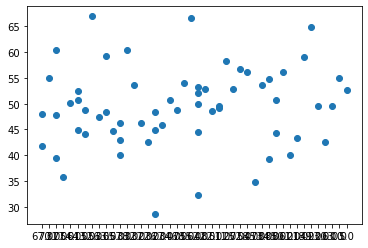

In [82]:
plt.scatter(y_test, predictions)

#### In the above scatter plot, we see data is in line with the shape, which means our model has done good predictions

In [83]:
regressor.score(X_test, y_test)

-0.17097740009799356

In [87]:
from sklearn import metrics

In [89]:
#Mean Squre Error
metrics.mean_squared_error(y_test, predictions)

560.8265878391805

In [91]:
#Model R^2 Value
metrics.r2_score(y_test, predictions)

-0.17097740009799356